In [5]:
print(df.columns)
print(df.dtypes)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('online_retail_II.csv')
df = df.dropna()  # Clean missing values

# Create a numeric target: TotalAmount
df['TotalAmount'] = df['Quantity'] * df['Price']

# Drop non-numeric or irrelevant columns
drop_cols = ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Customer ID', 'Country', 'TotalAmount']
features = df.drop(columns=drop_cols)
target = df['TotalAmount']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = target

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-6-755234790.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalAmount'] = df['Quantity'] * df['Price']


Linear Regression MSE: 20157.91


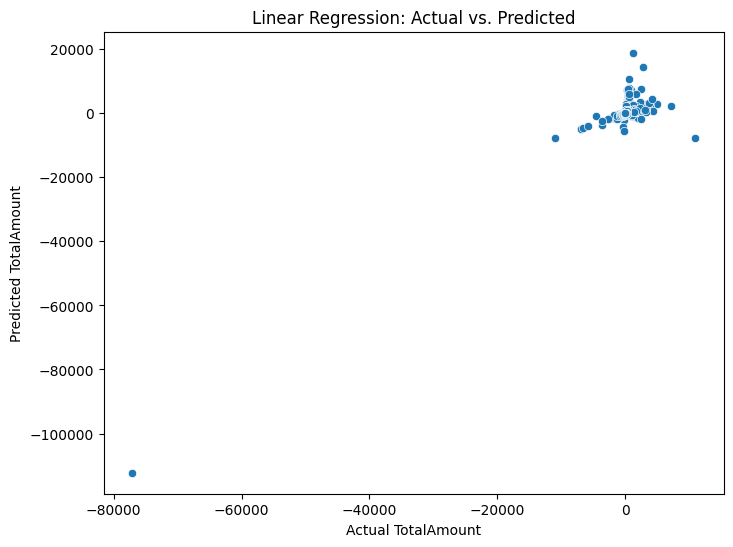

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual TotalAmount")
plt.ylabel("Predicted TotalAmount")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()


Decision Tree MSE: 56420.73


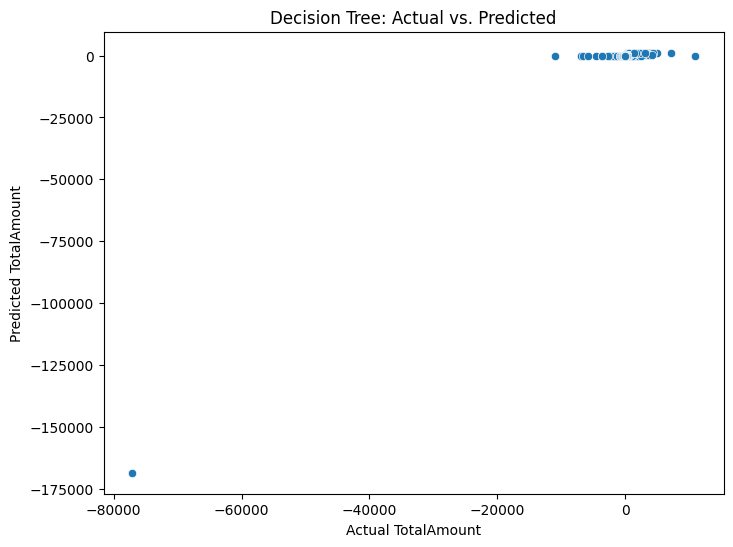

In [8]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel("Actual TotalAmount")
plt.ylabel("Predicted TotalAmount")
plt.title("Decision Tree: Actual vs. Predicted")
plt.show()


Random Forest MSE: 12718.09


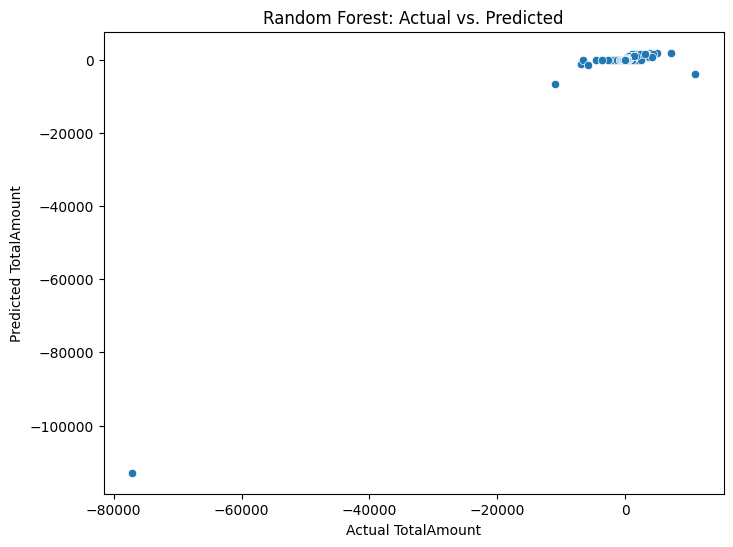

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual TotalAmount")
plt.ylabel("Predicted TotalAmount")
plt.title("Random Forest: Actual vs. Predicted")
plt.show()


In [10]:
print(f"MSE - Linear Regression: {mse_lr:.2f}")
print(f"MSE - Decision Tree: {mse_dt:.2f}")
print(f"MSE - Random Forest: {mse_rf:.2f}")


MSE - Linear Regression: 20157.91
MSE - Decision Tree: 56420.73
MSE - Random Forest: 12718.09


## Final Reflection

This lab gave me a much better understanding of how regression models work with real data. I used a retail dataset and created a new column called `TotalAmount` by multiplying quantity and price, which made sense to use as my target because it shows how much a customer spent on a purchase. I had to clean the data and drop things like invoice numbers, dates, and customer IDs, since they weren’t useful for predicting.

I started with a linear regression model, and while it was quick and simple, it didn’t perform as well because it assumes a straight-line relationship between the features and the target. That’s not always realistic for retail data. Then I tried a decision tree model and a random forest. The random forest gave me the best results because it could handle the patterns and interactions in the data a lot better than the linear model. It didn’t just rely on one split like a decision tree but combined multiple trees to reduce overfitting.

From this lab, I learned that linear models are best when the data is more straightforward and you want a model that’s easy to explain. But when your data has more complexity, like what I saw in this retail dataset, tree-based models like random forest usually do better. This hands-on experience helped me understand not just how to train a model, but also how to look at the results, compare performance, and decide what type of model fits the problem best.
## How the Lab Material Helped Me Learn

This lab walked me through the full process of using regression models on real-world data. First, I had to explore and clean the data by dropping missing values and irrelevant columns. Then I created a target variable by combining `Quantity` and `Price` to make `TotalAmount`, which gave me something meaningful to predict.

After that, I normalized the data and split it into training and test sets. I trained three models: linear regression, a decision tree regressor, and a random forest. Each model gave different results, and I learned how to compare them using mean squared error (MSE). I also made scatter plots to see how close the predicted values were to the actual values.

This lab helped me understand that the way data is prepared really affects the results. It also showed me how different models make different assumptions and why it's important to try more than one. The whole process—from cleaning the data to training models and evaluating them—helped me connect the theory to something real.
